In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage, misc
from scipy.linalg import toeplitz
import matplotlib.image as mpimg
np.set_printoptions(threshold=np.inf)
np.set_printoptions(precision=0)
np.set_printoptions(suppress=True)

288 287


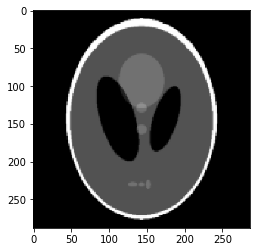

In [41]:
img   = mpimg.imread('phantom_test.png')
img   = img[:,:,1]
n,m   = img.shape
print(n,m)
img   = np.abs(1-img)

imgplot = plt.imshow(img, cmap='Greys')
plt.show()


In [46]:
nrad = 20
nang = 120

sino   = np.zeros((2*nrad,nang))
sinon  = np.zeros((2*nrad,nang))
image  = np.zeros((2*nrad,2*nrad))
imagen = np.zeros((2*nrad,2*nrad))


for i in range(n): # i=0-n-1. range(n)=range(0,288). n=288.
    for j in range(m):
        mag   = np.sqrt((j-m)**2 + (i-n)**2) #sqrt(xi^2 + yi^2)
        phase = np.arctan2(float(i-n/2), float(j-m/2)) # atan(yi,xi)
        for k in range(nang):
            angle = k*360.0/float(nang) #ang_i * step
            ang_i = (np.pi*angle)/180.0 #deg2rad
            ri    = np.int(mag*np.sin(ang_i+phase)) # r=m*sin(phase)
            if(ri<0):
                ri-=1 # ir = ir-1
            if(mag < nrad-1): #is diagonal greater than x or y? (cause must stay within a circle for polar coords)
                sino[nrad+ri,k]+=0.5*mag/nrad
                sino[nrad+ri+1,k]+=0.25*mag/nrad
                sino[nrad+ri-1,k]+=0.25*mag/nrad



(40, 120)


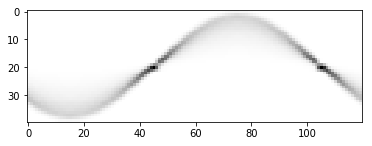

In [47]:
print(sino.shape)
imgplot = plt.imshow(sino,cmap='Greys')
imgplot.set_interpolation('nearest')
plt.show()
